# Loan Data by Prosper 
### by: Abdullah Mustafa

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others. To ease the analysis process, only 11 variables were chosen.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import textwrap

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
selected_cols = ['Term','LoanStatus','BorrowerAPR','BorrowerRate','EmploymentStatus','IsBorrowerHomeowner',
                 'AvailableBankcardCredit','IncomeRange','StatedMonthlyIncome',
                 'LoanOriginalAmount','MonthlyLoanPayment']
df = df[selected_cols]
df.sample(10)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,AvailableBankcardCredit,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
70688,36,Completed,0.14914,0.0999,Employed,False,4812.0,"$25,000-49,999",3166.666667,1100,35.49
89940,36,Completed,0.38723,0.3500,Full-time,False,564.0,"$50,000-74,999",4416.666667,2000,90.47
38450,36,Completed,0.30532,0.2699,Employed,True,0.0,"$75,000-99,999",7500.000000,10000,408.20
88470,36,Current,0.07992,0.0666,Employed,True,63439.0,"$75,000-99,999",7500.000000,11000,337.94
15519,36,Completed,0.35797,0.3177,Employed,True,182.0,"$100,000+",10400.000000,4000,173.71
5715,36,Current,0.08829,0.0749,Employed,True,8285.0,"$75,000-99,999",6250.000000,5000,155.51
24279,36,Current,0.18837,0.1520,Employed,True,1616.0,"$50,000-74,999",4750.000000,2000,69.53
3584,36,Completed,0.08930,0.0759,Employed,False,30761.0,"$25,000-49,999",3500.000000,2000,62.30
6864,36,Current,0.08930,0.0759,Employed,True,23352.0,"$75,000-99,999",6750.000000,19000,591.80
103678,36,Chargedoff,0.25757,0.2500,Not available,False,NaN,Not displayed,5000.000000,6000,238.56


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
Term                       113937 non-null int64
LoanStatus                 113937 non-null object
BorrowerAPR                113912 non-null float64
BorrowerRate               113937 non-null float64
EmploymentStatus           111682 non-null object
IsBorrowerHomeowner        113937 non-null bool
AvailableBankcardCredit    106393 non-null float64
IncomeRange                113937 non-null object
StatedMonthlyIncome        113937 non-null float64
LoanOriginalAmount         113937 non-null int64
MonthlyLoanPayment         113937 non-null float64
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 8.8+ MB


**There a few missing values in the data. We need to fill the null values or remove them before proceeding with the analysis.**

In [4]:
df['Term']=df['Term'].astype(str)
num_cols = ['BorrowerAPR', 'BorrowerRate', 'AvailableBankcardCredit',
            'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
cat_cols = ['LoanStatus','Term', 'IncomeRange', 'EmploymentStatus', 'IsBorrowerHomeowner']

In [5]:
for col in num_cols:
    df[col].fillna(df[col].mean(),inplace=True)
for col in cat_cols:
    df[col].fillna(df[col].mode(),inplace=True)

**Fill the null values with the mean for numerical data, and with the mode for object data.**

In [6]:
df.describe()

,BorrowerAPR,BorrowerRate,AvailableBankcardCredit,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113937.000000,113937.000000,1.139370e+05,113937.00000,113937.000000
mean,0.218828,0.192764,11210.225447,5.608026e+03,8337.01385,272.475783
std,0.080355,0.074818,19151.012691,7.478497e+03,6245.80058,192.697812
min,0.006530,0.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,0.156290,0.134000,1017.000000,3.200333e+03,4000.00000,131.620000
50%,0.209790,0.184000,4870.000000,4.666667e+03,6500.00000,217.740000
75%,0.283700,0.250000,12078.000000,6.825000e+03,12000.00000,371.580000
max,0.512290,0.497500,646285.000000,1.750003e+06,35000.00000,2251.510000


In [7]:
df.head(10)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,AvailableBankcardCredit,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
0,36,Completed,0.16516,0.1580,Self-employed,True,1500.000000,"$25,000-49,999",3083.333333,9425,330.43
1,36,Current,0.12016,0.0920,Employed,False,10266.000000,"$50,000-74,999",6125.000000,10000,318.93
2,36,Completed,0.28269,0.2750,Not available,False,11210.225447,Not displayed,2083.333333,3001,123.32
3,36,Current,0.12528,0.0974,Employed,True,30754.000000,"$25,000-49,999",2875.000000,10000,321.45
4,36,Current,0.24614,0.2085,Employed,True,695.000000,"$100,000+",9583.333333,15000,563.97
5,60,Current,0.15425,0.1314,Employed,True,86509.000000,"$100,000+",8333.333333,15000,342.37
6,36,Current,0.31032,0.2712,Employed,False,1929.000000,"$25,000-49,999",2083.333333,3000,122.67
7,36,Current,0.23939,0.2019,Employed,False,2181.000000,"$25,000-49,999",3355.750000,10000,372.60
8,36,Current,0.07620,0.0629,Employed,True,77696.000000,"$25,000-49,999",3333.333333,10000,305.54
9,36,Current,0.07620,0.0629,Employed,True,77696.000000,"$25,000-49,999",3333.333333,10000,305.54


### What is the structure of your dataset?

> The data is made up of 113,937 rows with a total of 81 features out of which only 11 were chosen for analysis. These features are ('LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatus', 'IsBorrowerHomeowner','AvailableBankcardCredit', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment'). The datatypes include numerical (Discrete and continous), categorical (nominal and ordinal), and boolean. Despite having no given order for categorical ordinal data, they were ordered according to my best of knowledge. 

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is the "LoanStatus" which would be investigated bases on the other features. Also, the APR and interest rates would be investigated.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To predict the "LoanStatus", fetures likes "IsBorrowerHomeowner", "AvailableBankcardCredit", "IncomeRange", and "EmploymentStatus" would be of great importance. Similiarly, the "BorrowerAPR" and the "BorrowerRate" would depend on the "LoanOriginalAmount" , "MonthlyLoanPayment", and "StatedMonthlyIncome". 

## Univariate Exploration

> Let's first investigate the features individually using histograms for numerical data and bar charts for categorical data.

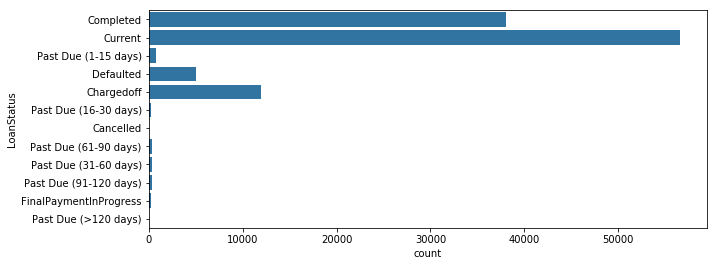

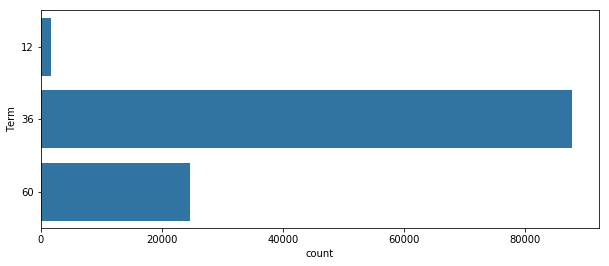

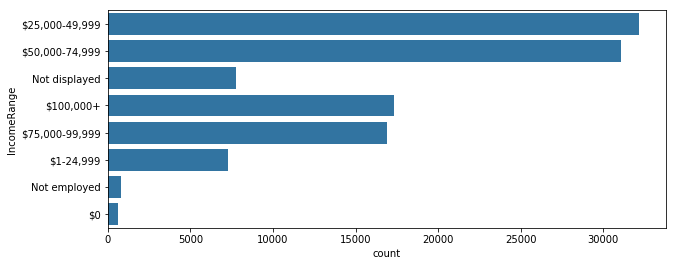

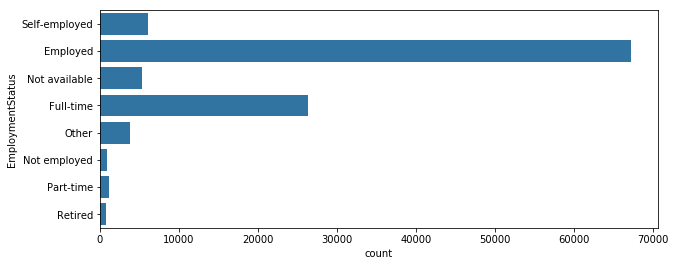

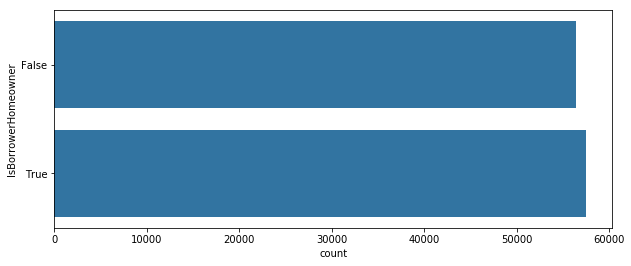

In [8]:
default_color = sb.color_palette()[0]
for i,var in enumerate(cat_cols):
    plt.figure(i,figsize=(10,4))
    sb.countplot(data = df, y = var, color = default_color)

**To ease the analysis, the following is proposed: **
> ** >>LoanStatus: the ('Past Due (1-15 days)','Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Cancelled', 'Chargedoff') would be grouped in a single "Incomplete" category and the "FinalPaymentInProgress" category to the "Completed" category"**

> ** >>IncomeRange: Join the '0', 'Not displayed', and 'Not employed' categories into a "0" category.**

> ** >>EmploymentStatus: Make into two categories "Employed" and "not Employed".**

**The ratio of home owners to non-home owners is almost 50/50.**

**36 months is the most common Term period of a loan.**

In [9]:
df.LoanStatus.replace(['FinalPaymentInProgress'],'Completed',inplace=True)
df.LoanStatus.replace(['Past Due (1-15 days)','Past Due (16-30 days)', 'Past Due (31-60 days)',
                       'Past Due (61-90 days)', 'Past Due (91-120 days)','Past Due (>120 days)',
                       'Defaulted','Cancelled','Chargedoff'],'Incompleted',inplace=True)

df.IncomeRange.replace(['Not displayed', 'Not employed'],'$0',inplace=True)

df.EmploymentStatus.replace(['Full-time', 'Part-time','Self-employed'],'Employed',inplace=True)
df.EmploymentStatus.replace(['Retired', 'Not available', 'Other'],'Not employed',inplace=True)

In [10]:
# convert into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Completed', 'Current', 'Incompleted'],
                    'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999', '$0'],
                    'EmploymentStatus': ['Employed', 'Not employed'],
                    'Term':['12','36','60']}
ordinal_vars = ['LoanStatus','Term','IncomeRange','EmploymentStatus']
for var in ordinal_vars:
    df[var] = pd.Categorical(df[var], categories= ordinal_var_dict[var], ordered=True)


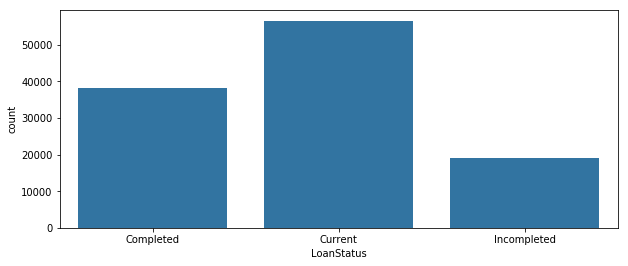

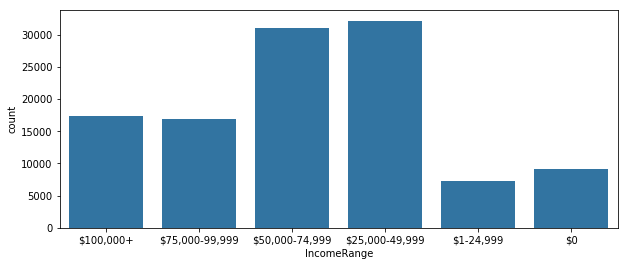

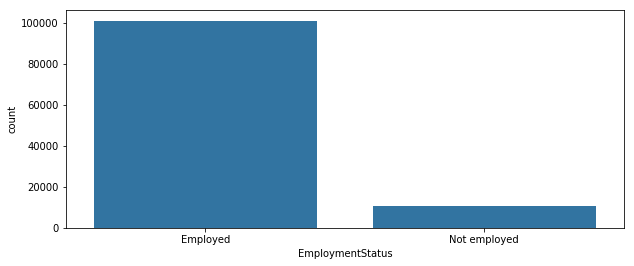

In [11]:
for i,var in enumerate(['LoanStatus','IncomeRange','EmploymentStatus']):
    plt.figure(i,figsize=(10,4))
    sb.countplot(data = df, x = var, color = default_color)

**By having fewer categories, it becomes possible to draw general conclusions about the dataset. Detailed investigations of sub-categories can be conducted later.**
**From the above figures, the following findings can be seen:**
1. **The most common "LoanStatus" is [Current]; in which we aren't really interested.**
2. **Most loans come from customers with income range between 25,000 to 75,000 USD.**
3. **Employed persons are more likely to ask for loans than unemployed ones.**

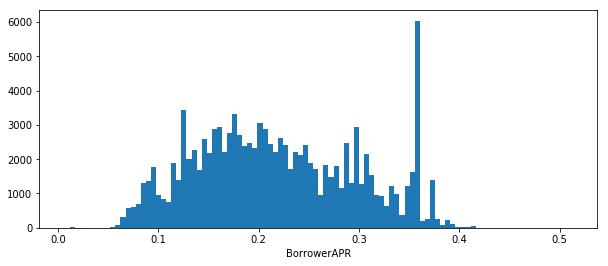

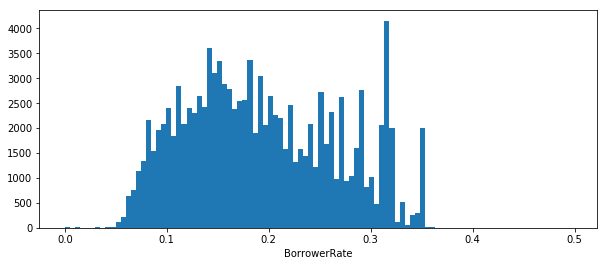

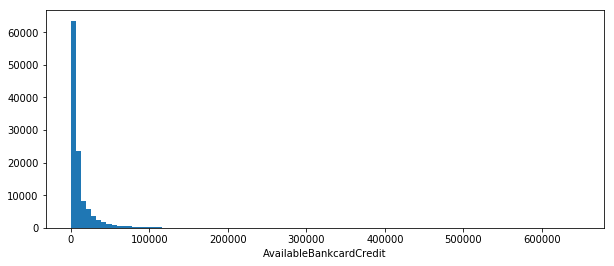

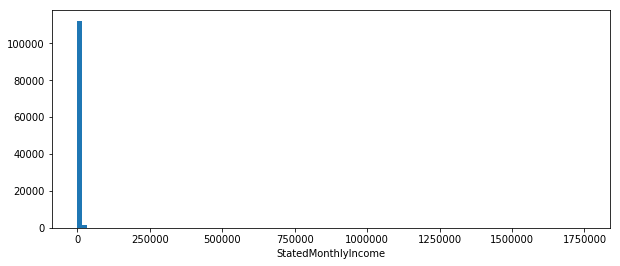

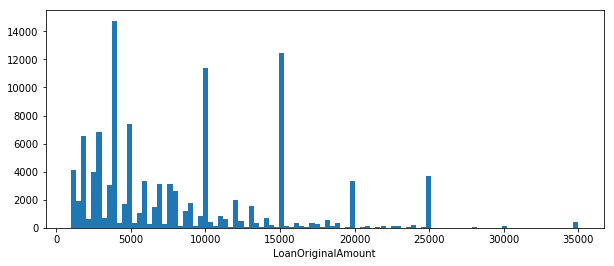

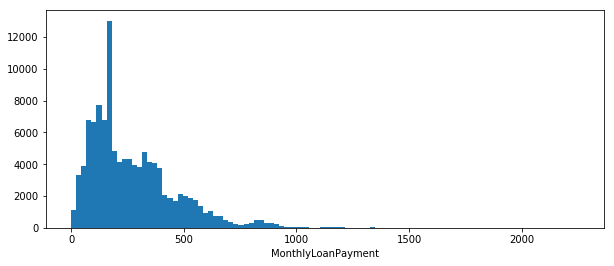

In [12]:
default_color = sb.color_palette()[0]
for i,var in enumerate(num_cols):
    plt.figure(i,figsize=(10,4))
    var_min = min(df[var])
    var_max = max(df[var])
    no_bins = 100
    step = (var_max-var_min)/no_bins
    bins = np.arange(var_min, var_max+step/2, step)
    plt.hist(data = df, x = var, bins = bins)
    plt.xlabel(var)

1. ** The "BorrowerAPR" column seems nomrally ditributed (maybe slightluy right-skewed) with unusual rise around 0.35 APR value.**
2. ** The "BorrowerRate" column is also right-skewed with several peaks.**
3. ** The "AvailableBankcardCredit" column is highly skewed to the right.**
4. ** The "StatedMonthlyIncome" column is also skewed as well as having some extreme outliers.**
5. ** The "LoanOriginalAmount" column doesn't have a clear ditribution. It has several discrete peaks at a whole sum values like 5k, 10k, 15k,..etc. Most of the loans are below 15k.**
6. ** The 'MonthlyLoanPayment' column is also skewed as well as having some extreme outliers.**

> **The "BorrowerAPR" and the "BorrowerRate" seem to have a good corrolation**

> **These outliers would require a little cleaning. A log scale plots can then be recreated to see better trends.**

In [13]:
df = df[(df.AvailableBankcardCredit < 1e5) & (df.StatedMonthlyIncome < 1e5) & (df.MonthlyLoanPayment < 1.5e3)]

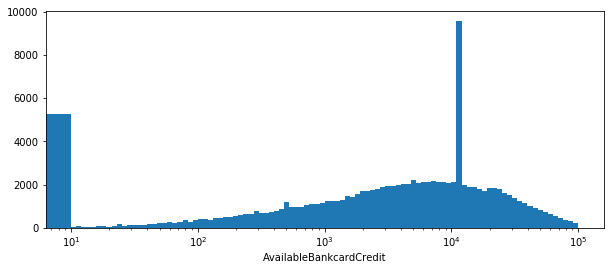

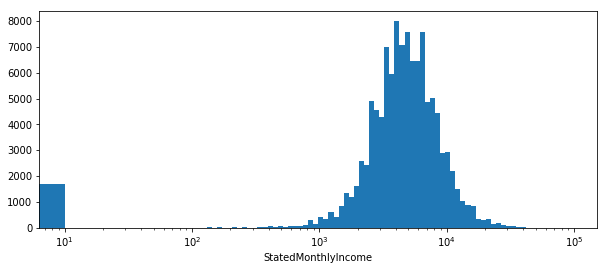

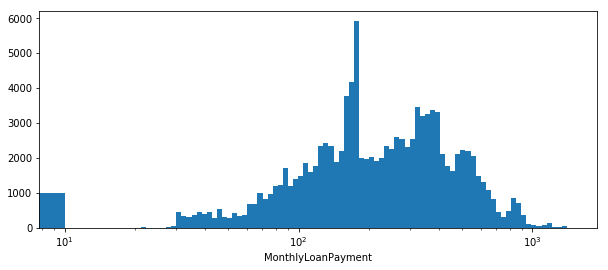

In [14]:
red_num_cols = [ 'AvailableBankcardCredit', 'StatedMonthlyIncome',  'MonthlyLoanPayment']
for i,var in enumerate(red_num_cols):
    plt.figure(i,figsize=(10,4))
    var_min = min(df[var]) + 10
    var_max = max(df[var])
    log_binsize = (np.log10(var_max)-np.log10(var_min))/100
    bins =  [0] + list(10**np.arange(np.log10(var_min), np.log10(var_max)+log_binsize/2, log_binsize))
    plt.hist(data = df, x = var, bins = bins)
    plt.xlabel(var)
    plt.xscale('log')

In [15]:
df.MonthlyLoanPayment.value_counts()

173.71    2421
0.00       930
172.76     535
86.85      472
174.20     459
130.28     369
163.28     286
326.62     279
166.54     277
136.98     277
165.15     271
161.99     265
169.78     255
163.56     252
45.24      248
168.17     246
168.89     227
87.10      186
67.85      184
166.73     183
135.71     177
90.47      172
172.56     171
108.57     167
125.72     158
155.80     157
172.60     154
168.32     154
384.58     146
127.36     146
          ... 
281.60       1
918.93       1
455.56       1
173.66       1
521.12       1
122.50       1
104.88       1
99.22        1
259.16       1
247.68       1
698.03       1
117.43       1
144.48       1
972.57       1
144.52       1
919.69       1
405.81       1
187.13       1
286.93       1
121.91       1
519.41       1
58.73        1
58.52        1
438.53       1
861.13       1
777.70       1
963.83       1
232.69       1
210.18       1
120.67       1
Name: MonthlyLoanPayment, Length: 23431, dtype: int64

In [16]:
df[df.AvailableBankcardCredit.round(6) == 11210.225447].describe()

,BorrowerAPR,BorrowerRate,AvailableBankcardCredit,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,7541.000000,7541.000000,7.541000e+03,7541.000000,7541.000000,7541.000000
mean,0.199420,0.189919,1.121023e+04,4660.455676,5117.942448,180.647751
std,0.069275,0.069112,1.073275e-10,3988.653493,4929.709532,175.713726
min,0.006530,0.000000,1.121023e+04,0.000000,1000.000000,0.000000
25%,0.147090,0.138000,1.121023e+04,2500.000000,2100.000000,76.380000
50%,0.197300,0.190000,1.121023e+04,3750.000000,3001.000000,121.300000
75%,0.257070,0.245000,1.121023e+04,5750.000000,6000.000000,215.000000
max,0.512290,0.497500,1.121023e+04,80000.000000,25000.000000,1047.640000


In [17]:
df.MonthlyLoanPayment.value_counts()

173.71    2421
0.00       930
172.76     535
86.85      472
174.20     459
130.28     369
163.28     286
326.62     279
166.54     277
136.98     277
165.15     271
161.99     265
169.78     255
163.56     252
45.24      248
168.17     246
168.89     227
87.10      186
67.85      184
166.73     183
135.71     177
90.47      172
172.56     171
108.57     167
125.72     158
155.80     157
172.60     154
168.32     154
384.58     146
127.36     146
          ... 
281.60       1
918.93       1
455.56       1
173.66       1
521.12       1
122.50       1
104.88       1
99.22        1
259.16       1
247.68       1
698.03       1
117.43       1
144.48       1
972.57       1
144.52       1
919.69       1
405.81       1
187.13       1
286.93       1
121.91       1
519.41       1
58.73        1
58.52        1
438.53       1
861.13       1
777.70       1
963.83       1
232.69       1
210.18       1
120.67       1
Name: MonthlyLoanPayment, Length: 23431, dtype: int64

1. **The transformed "AvailableBankcardCredit" column is left skewed with sharp rise around 11210.225447 which is shared by over 7500 entries. This is interesting finding by hard to explore further. Maybe, it is some wrong entry. It better be removed for now.**
2. **The transformed "StatedMonthlyIncome" is normally distributed.**
3. **The transformed "MonthlyLoanPayment" is also left skewed with sharp rise around 173 which is shared by over 4500 entries. They should be removed as well.**

In [18]:
df = df[(df.AvailableBankcardCredit.round(6) != 11210.225447) & (~df.MonthlyLoanPayment.between(172,174))]

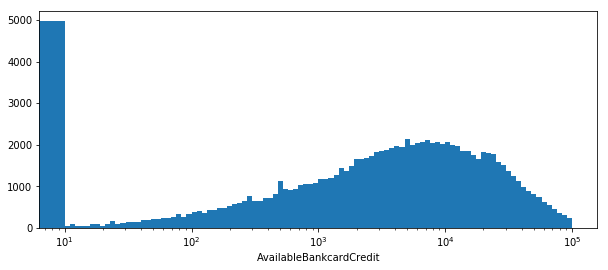

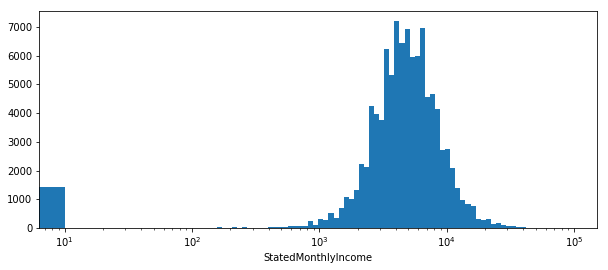

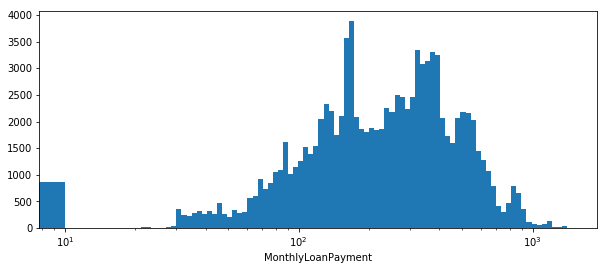

In [19]:
red_num_cols = [ 'AvailableBankcardCredit', 'StatedMonthlyIncome',  'MonthlyLoanPayment']
for i,var in enumerate(red_num_cols):
    plt.figure(i,figsize=(10,4))
    var_min = min(df[var]) + 10
    var_max = max(df[var])
    log_binsize = (np.log10(var_max)-np.log10(var_min))/100
    bins =  [0] + list(10**np.arange(np.log10(var_min), np.log10(var_max)+log_binsize/2, log_binsize))
    plt.hist(data = df, x = var, bins = bins)
    plt.xlabel(var)
    plt.xscale('log')

> **Looks better now!**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **Categorical columns**: Some of the categories within a given column had a very limited data points. Thus, similar categories were joined to reduce the number of overall categories and ease the data exploration.

> **Numerical columns**: AS stated above, lots of the data seemed to be right-skewed; however, after transformation many of them became left skewed. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. The "LoanOriginalAmount" had several peaks since loans are typically around whole sums like 5k, 10k or 15k.
> 2. Within the numberical columns, a few outliers was found and removed. Sharp peaks was also detected and removed to better identify the trends in the data.
> 3. There are many data point with 0 entry which might affect regression models.


In [20]:
df.shape

(101831, 11)

## Bivariate Exploration

> Let's start by exploring the relation between numberic columns (corrolations)

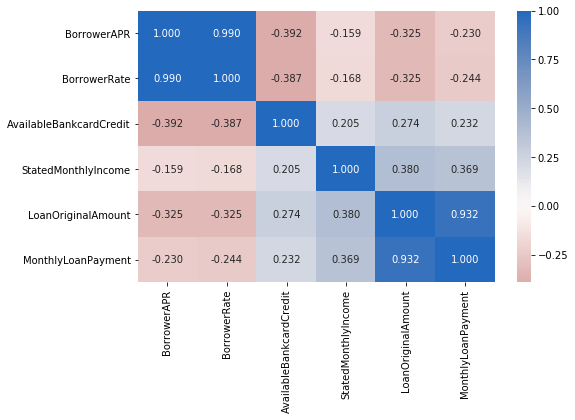

In [21]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[num_cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

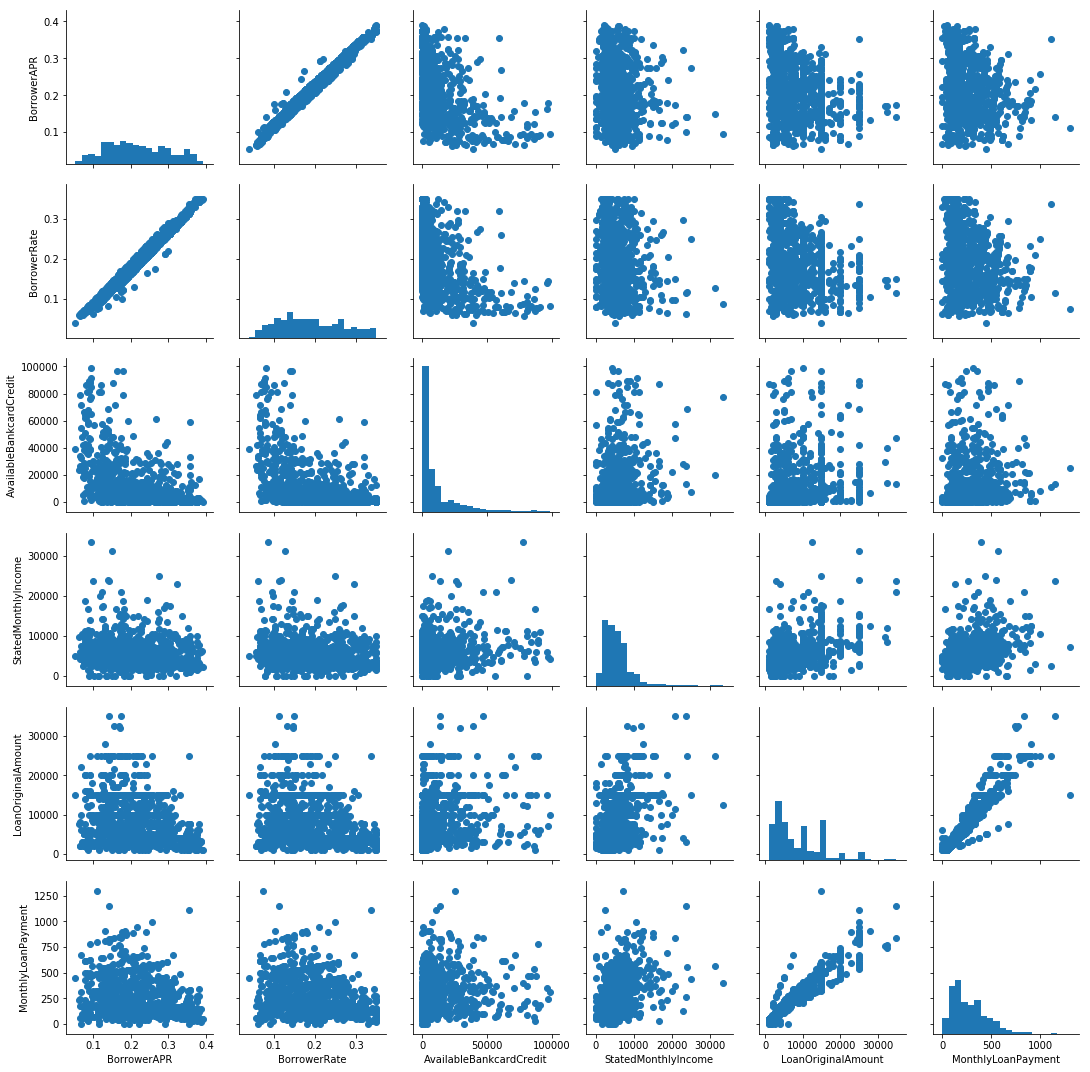

In [22]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
df_samp = df.sample(1000)
g = sb.PairGrid(data = df_samp, vars = num_cols)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

- **From the corrolation heatmap and the pairGrid, we can notice the strong corrolation between "BorrowerAPR" and "BorrowerRate" as well as the relation between the "MonthlyLoanAmount" and the "LoanOriginalAmount".**
- **Other plots don't have a clear corrolations.**

C:\Users\MoritaLab_Student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


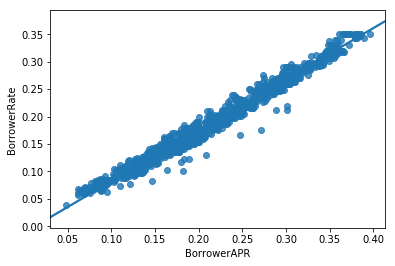

In [23]:
sb.regplot(data=df_samp,x='BorrowerAPR',y='BorrowerRate',x_jitter=0.01);

> **We can see a direct corrolation between the "BorrowerAPR" and the "BorrowerRate" with a coefficient of about 0.99. From their defenitions, I can't really tell the difference between them, so such corroloation was expected. Thus, coming analysis will focus only on the APR.** 

C:\Users\MoritaLab_Student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


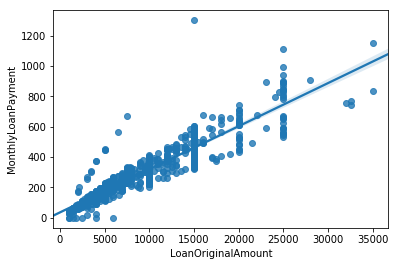

In [24]:
sb.regplot(data=df_samp,x='LoanOriginalAmount',y='MonthlyLoanPayment',x_jitter=0.01);

> **There was also a less strong corrolation between the "MonthlyLoanPayment" and the "LoanOriginalAmount". We can see lines of multiple slopes. Introducing an additional variable may bettter explain the relation.**


### LoanStatus Vs. other features  
    Let's examine the "LoanStatus" against other features starting with catergorical features.

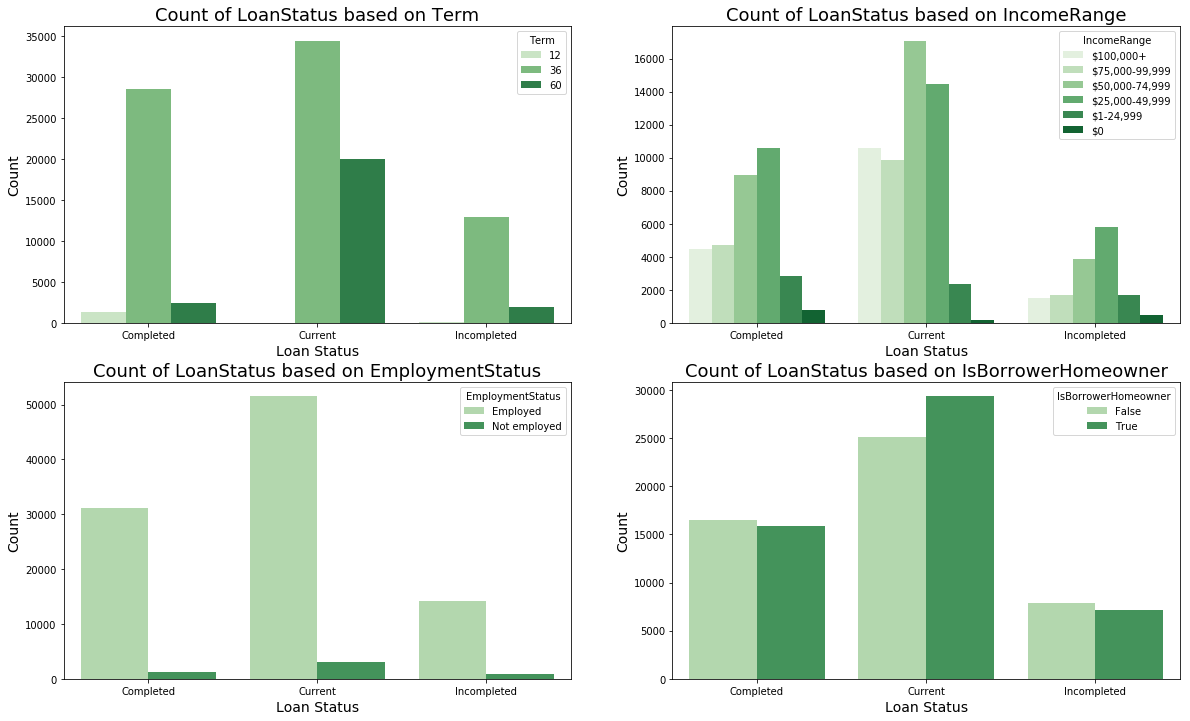

In [25]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [20,12]); 
for i,var in enumerate(['Term','IncomeRange', 'EmploymentStatus', 'IsBorrowerHomeowner']):
    sb.countplot(data = df, x = 'LoanStatus', hue = var, palette = 'Greens',ax=ax[i//2,i%2])
    ax[i//2,i%2].set_title('Count of LoanStatus based on ' + var,fontsize = 18 )
    ax[i//2,i%2].set_ylabel('Count',fontsize = 14)
    ax[i//2,i%2].set_xlabel('Loan Status',fontsize = 14)    

**Using barcharts, it is hard to see clearly the changes in LoanStatus based the categorical variables.**

Maybe we can try stacked barcharts. Comparing ratios might be easier than comparing counts.

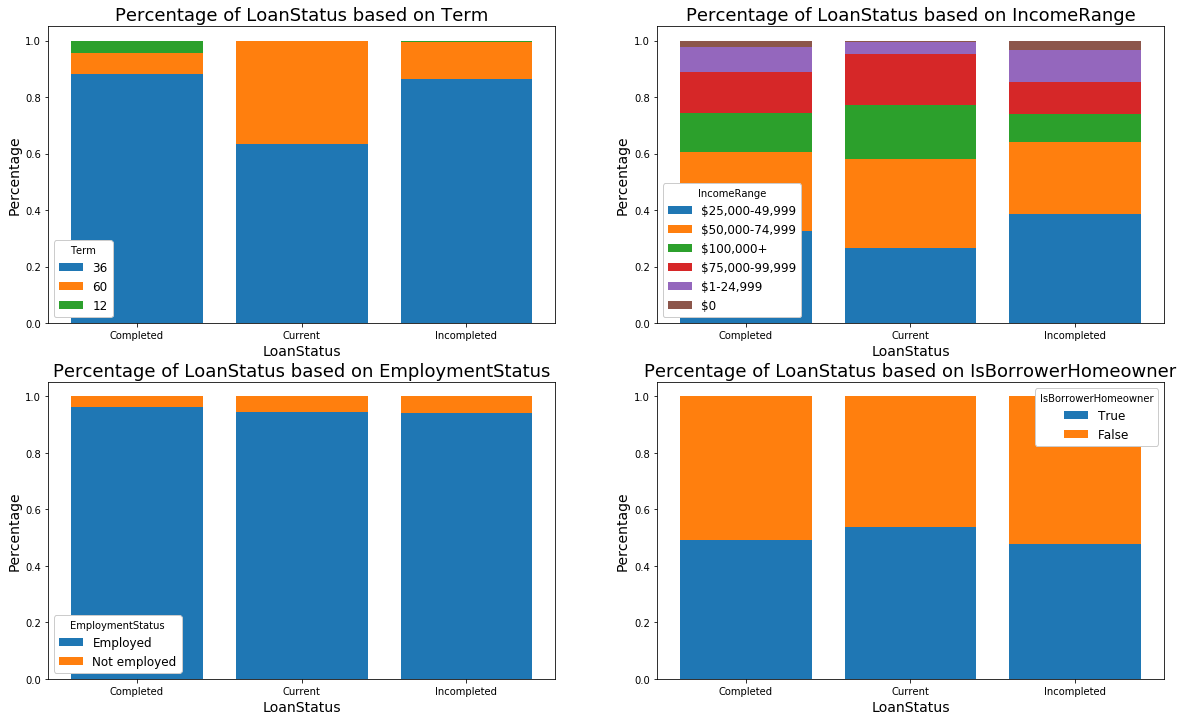

In [26]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [20,12]); 
for k,var in enumerate(['Term','IncomeRange', 'EmploymentStatus', 'IsBorrowerHomeowner']):
    cat1_order = pd.unique(df.LoanStatus)
    cat2_order = df[var].value_counts().index

    artists = [] # for storing references to plot elements
    baselines = np.zeros(len(cat1_order))
    cat1_counts = df['LoanStatus'].value_counts()

    # for each second-variable category:
    for i in range(len(cat2_order)):
        # isolate the counts of the first category,
        cat2 = cat2_order[i]
        inner_counts = df[df[var] == cat2]['LoanStatus'].value_counts()
        inner_props = inner_counts / cat1_counts
        # then plot those counts on top of the accumulated baseline
        bars = ax[k//2,k%2].bar(left = np.arange(len(cat1_order)),
                       height = inner_props[cat1_order],
                       bottom = baselines)
        artists.append(bars)
        baselines += inner_props[cat1_order]
    ax[k//2,k%2].set_xlabel('LoanStatus',fontsize=14);
    ax[k//2,k%2].set_xticks(np.arange(len(cat1_order)))
    ax[k//2,k%2].set_xticklabels(cat1_order);
    ax[k//2,k%2].set_ylabel('Percentage',fontsize=14);
    ax[k//2,k%2].set_title('Percentage of LoanStatus based on ' + var,fontsize = 18 )
    ax[k//2,k%2].legend(cat2_order, framealpha = 1,loc = 'best',title=var,prop={'size': 12});
    

- **Stacked plots make it easier to compare ratios within a certain category of "LoanStatus" while barcharts are more convientient to compare across all categories based on count.**
- **Unfortunately, "LoanStatus" seems very low dependency on any of the categorical features. From the stacked plots, we can see that the ratio of "Completed" and "Incompleted" across different features is almost the same. Meaning that the "LoanStatus" is independent of these features.**

> Let's just ignore the "LoanStatus" [Current] category and drive the ratios between the [Completed] and [Incompleted] categories.

C:\Users\MoritaLab_Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


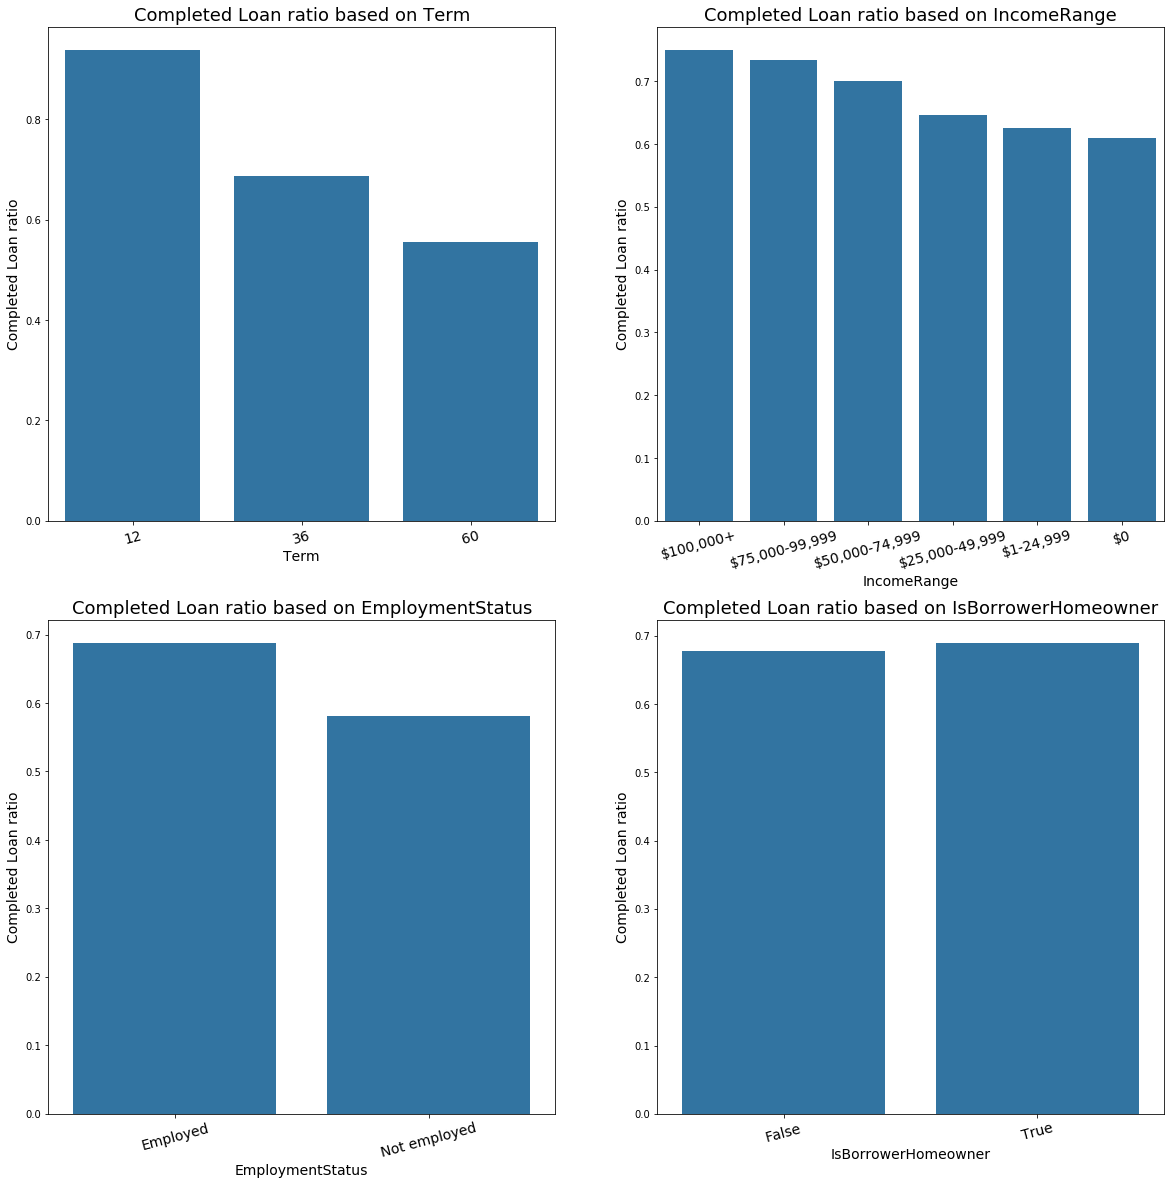

In [27]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [20,20]); 
for i,var in enumerate(['Term','IncomeRange', 'EmploymentStatus', 'IsBorrowerHomeowner']):
    Loan_status = df.groupby([var,'LoanStatus']).size()
    Loan_status = Loan_status.reset_index(name = 'loan_count')
    Loan_status_Complete = Loan_status[Loan_status.LoanStatus == "Completed"]
    Loan_status_Incomplete = Loan_status[Loan_status.LoanStatus == "Incompleted"]
    Loan_status_Complete['ratio'] = Loan_status_Complete.loan_count.values / (Loan_status_Complete.loan_count.values +
                                                              Loan_status_Incomplete.loan_count.values)
    sb.barplot(data = Loan_status_Complete, x = var,y='ratio',color=default_color,ax = ax[i//2,i%2])
    ax[i//2,i%2].set_title('Completed Loan ratio based on ' + var,fontsize = 18 )
    ax[i//2,i%2].set_ylabel('Completed Loan ratio',fontsize = 14)
    ax[i//2,i%2].set_xlabel(var,fontsize = 14)
    ax[i//2,i%2].set_xticklabels([textwrap.fill(t.get_text(), 15)  for t in ax[i//2,i%2].get_xticklabels()],fontsize=14,rotation=15)


**Now, it is clear even if it is with a small margin. We can see the following:**
1. **Term**: Shorter loan terms (12) have higher completion rations than longer ones (60).
2. **IncomeRange**: Those with higher income are more likely to complete their loan payment.
3. **EmploymentStatus**: Employed persons are more capable of completing their loan than unemployed ones.
4. **IsBorrowerHomeowner**: Owning a home gives a slightly higher probablity of completing the loan.

Let's now investigate the relation between "LoanStatus and numeric features.

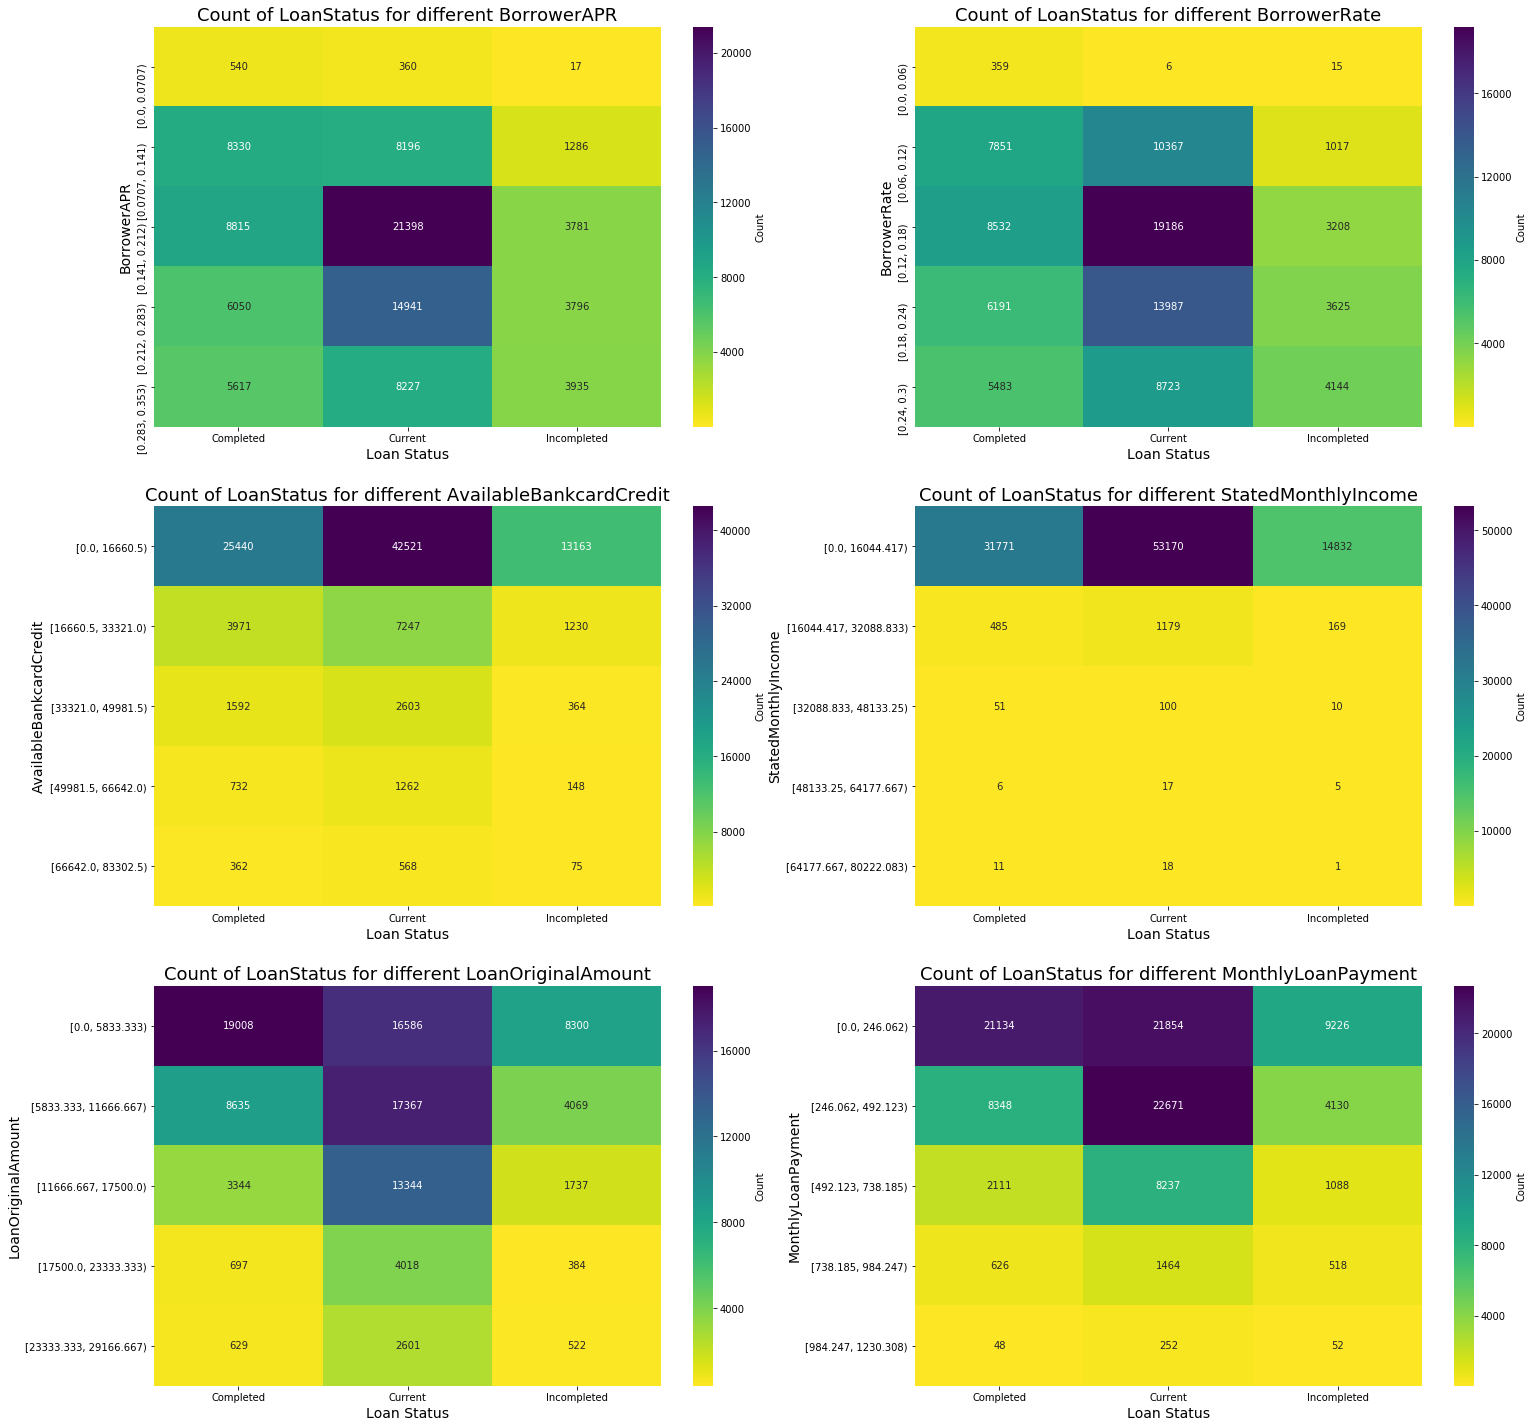

In [28]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = [25,25]); 
for i,var in enumerate(num_cols):
    xbin_edges = np.arange(0, df[var].max(),df[var].max()/6 )
    xbin_idxs = pd.cut(df[var], xbin_edges, right = False, include_lowest = True)
    Loan_status_count = df.groupby([xbin_idxs,'LoanStatus']).size()
    Loan_status_count = Loan_status_count.reset_index(name = 'loan_count')
    Loan_status_count = Loan_status_count.pivot(index = var, columns = 'LoanStatus',values = 'loan_count')
    
    sb.heatmap(Loan_status_count,annot = True,fmt = 'd', cmap = 'viridis_r', cbar_kws = {'label' : 'Count'},ax=ax[i//2,i%2])
    ax[i//2,i%2].set_title('Count of LoanStatus for different ' + var,fontsize = 18 )
    ax[i//2,i%2].set_ylabel(var,fontsize = 14)
    ax[i//2,i%2].set_xlabel('Loan Status',fontsize = 14)    


**Heatmaps have higher variations across the variable axis, and it becomes hard to compare the LoanStatus ratios.**
> Maybe, we need to compare mean change in these variables rather than count. Let's use boxplots.

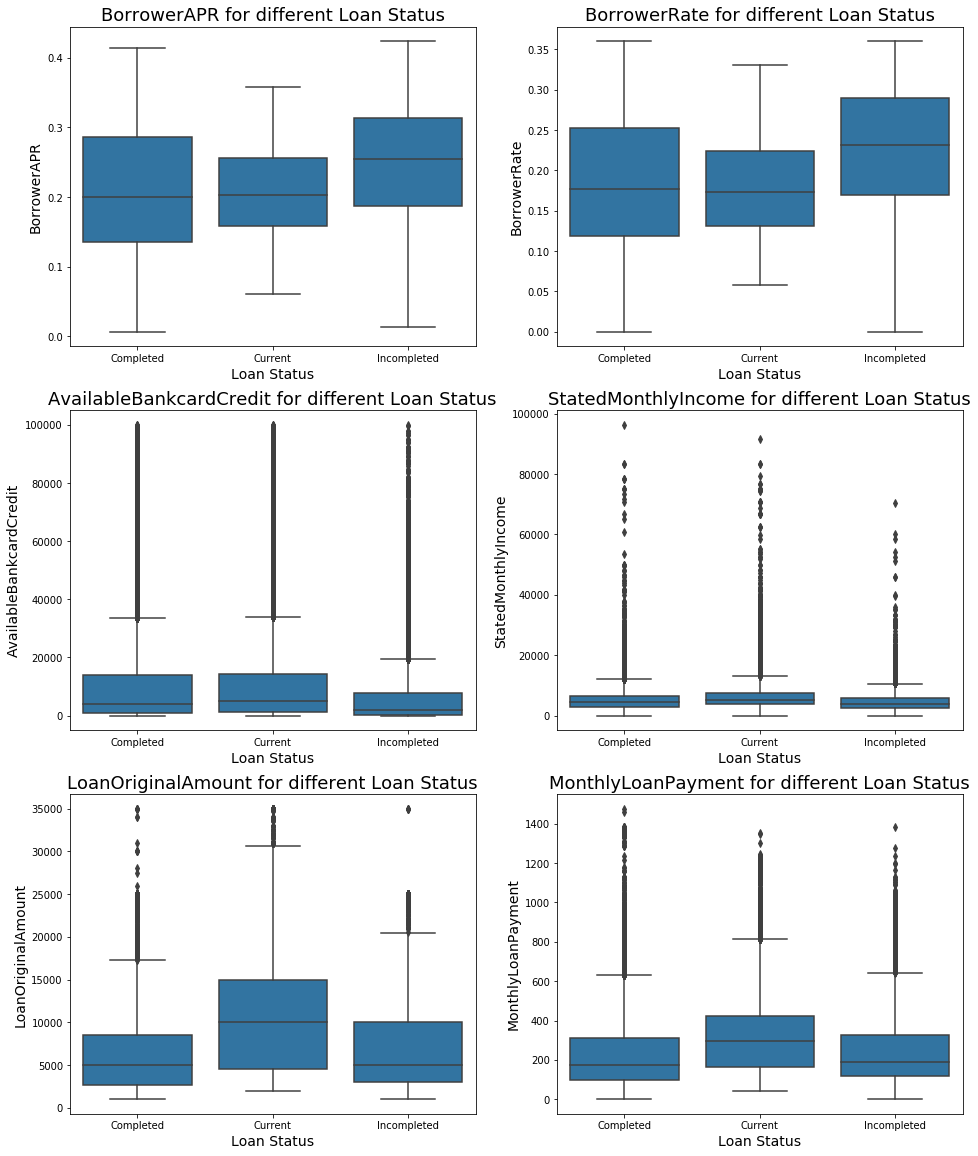

In [29]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = [16,20]); 
for i,var in enumerate(num_cols):
    sb.boxplot(data=df,x='LoanStatus',y=var,color=default_color,ax=ax[i//2,i%2])
    ax[i//2,i%2].set_title(var + ' for different Loan Status',fontsize = 18 )
    ax[i//2,i%2].set_ylabel(var,fontsize = 14)
    ax[i//2,i%2].set_xlabel('Loan Status',fontsize = 14)    

**Indeed, we can see a difference in mean of the LoanStatus categories based on the numberic features. The outliers make it hard to clearly see the change in some features.**
> However, it is still hard to compare ratios. Let's just calculate the ratios and plot using a barplot.

C:\Users\MoritaLab_Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


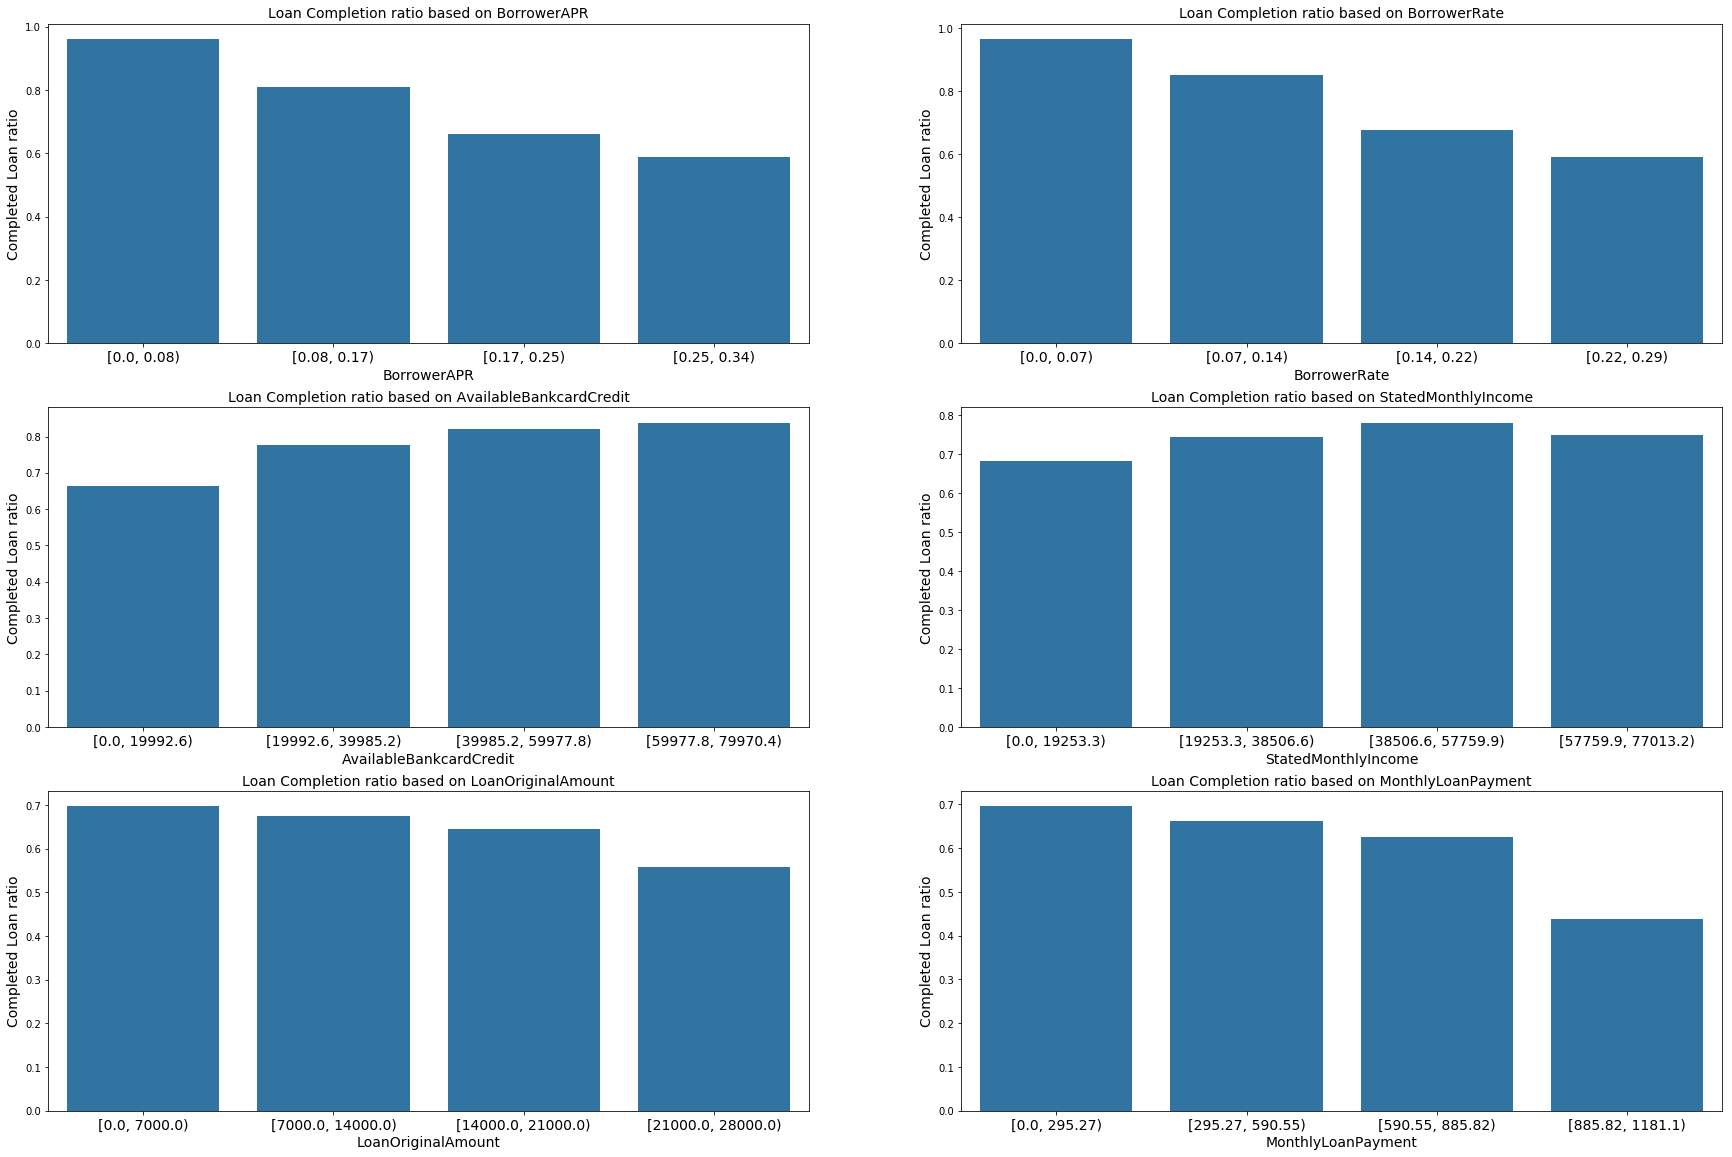

In [30]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = [30,20]); 
for i,var in enumerate(num_cols):
    xbin_edges = np.arange(0, df[var].max(),df[var].max()/5).round(2) 
    xbin_idxs = pd.cut(df[var], xbin_edges, right = False, include_lowest = True)
    Loan_status_count = df.groupby([xbin_idxs,'LoanStatus']).size()
    Loan_status_count = Loan_status_count.reset_index(name = 'loan_count')
    Loan_status_Complete = Loan_status_count[Loan_status_count.LoanStatus == "Completed"]
    Loan_status_Incomplete = Loan_status_count[Loan_status_count.LoanStatus == "Incompleted"]
    Loan_status_Complete['ratio'] = Loan_status_Complete.loan_count.values / (Loan_status_Complete.loan_count.values +
                                                              Loan_status_Incomplete.loan_count.values)
    sb.barplot(data = Loan_status_Complete, x = var,y='ratio',color=default_color,ax = ax[i//2,i%2])
    ax[i//2,i%2].set_title('Loan Completion ratio based on ' + var,fontsize = 14 )
    ax[i//2,i%2].set_ylabel('Completed Loan ratio',fontsize = 14)
    ax[i//2,i%2].set_xlabel(var,fontsize = 14)  
    ax[i//2,i%2].set_xticklabels([textwrap.fill(t.get_text(), 40)  for t in ax[i//2,i%2].get_xticklabels()],fontsize=14)



**Based on the completion ratios from the bar chart, we can see the following:**
1. **BorrowerAPR**: Loans with lower APR are more likely to be completed.
2. **BorrowerRate**: Loans with lower interest rate are more likely to be completed.
3. **AvailableBankcardcredit**: The larger the credit, the higher the completion rate.
4. **StatedMonthlyIncome**: Overall, we can suggest that higher monthly income suggests higher completion ratios.
5. **LoanOriginalAmount**: The larger the loan, the lower the completion ratio.
6. **MonthlyLoanPayment**: Lower monthly loan payments have higher completion ratios.


### BorrowerAPR Vs. other features

C:\Users\MoritaLab_Student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


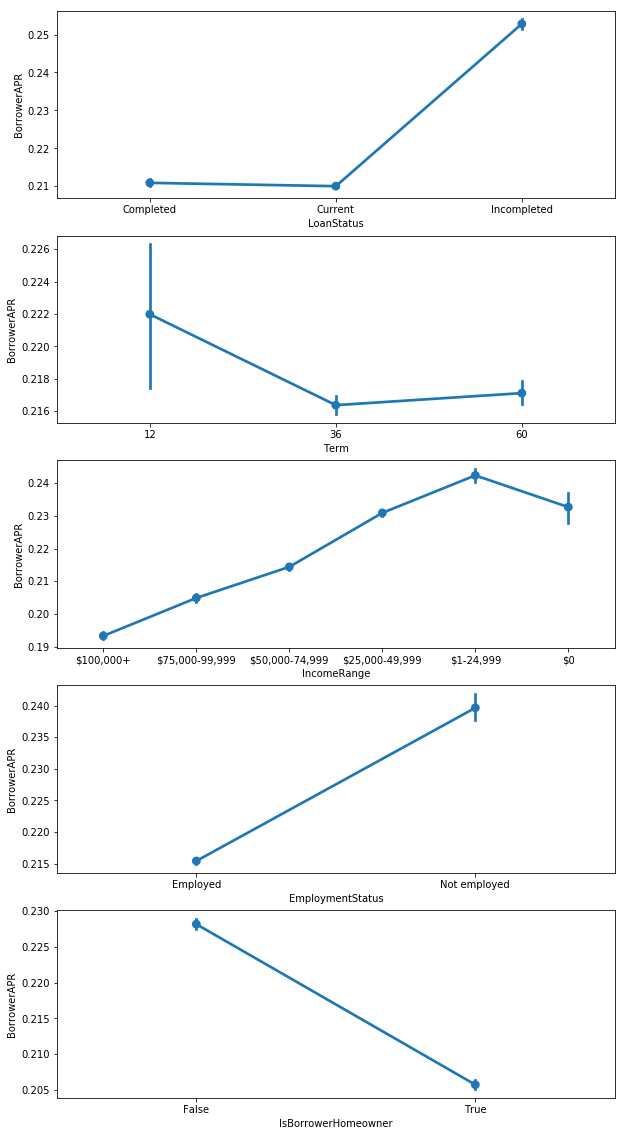

In [31]:
fig, ax = plt.subplots(nrows = len(cat_cols), ncols = 1, figsize = [10,20]); 
for i, var in enumerate(cat_cols):
    sb.pointplot(data=df,y='BorrowerAPR',x=var,ax=ax[i])

**From the point plots, we can make a few conclusions concering the "BorrowerAPR":**
1. LoanStatus: Incompleted loans have higher APRs.
2. Term: Short term periods have higher APRs
3. IncomeRange: Higher incomes have lower APRs
4. EmploymentStatus: Employed status has a lower APR
5. IsBorrowerHomeowner: Home owners get lower APRs.

> We can investigate this further using multivariate plots.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The main feature of interest was the "LoanStatus". The dependance on other categorical and nmberical features was illustrated using the change in completion ratio within the categories of other features.
> BorrowerAPR was found to be dependent on other categorical features.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The corrolation between APR and interest rate was found. Also, the monthly loan amount was corrolated with the orignal loan amount.

## Multivariate Exploration

> The multivariate plots is mainly to check for any interaction between the features and how it might affect the APR. Heatmap is a good tool for this task.

In [32]:
def heatmapGrid(x, y,ax):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    mean_APR = df.groupby([x,y]).BorrowerRate.mean()
    mean_APR = mean_APR.reset_index(name = 'APRmean')
    mean_APR = mean_APR.pivot(index = x, columns = y,values = 'APRmean')
    sb.heatmap(mean_APR,annot = True, cmap = "YlGnBu", cbar_kws = {'label' : 'mean_BorrowerAPR'},ax=ax)
    ax.set_title(textwrap.fill(cols[i] + ' Vs. ' + cols[j], 20),fontsize = 16)
    ax.set_ylabel(x,fontsize = 12)
    ax.set_xlabel(y,fontsize = 12)
    ax.set_xticklabels([textwrap.fill(t.get_text(), 15)  for t in ax.get_xticklabels()],rotation=90)


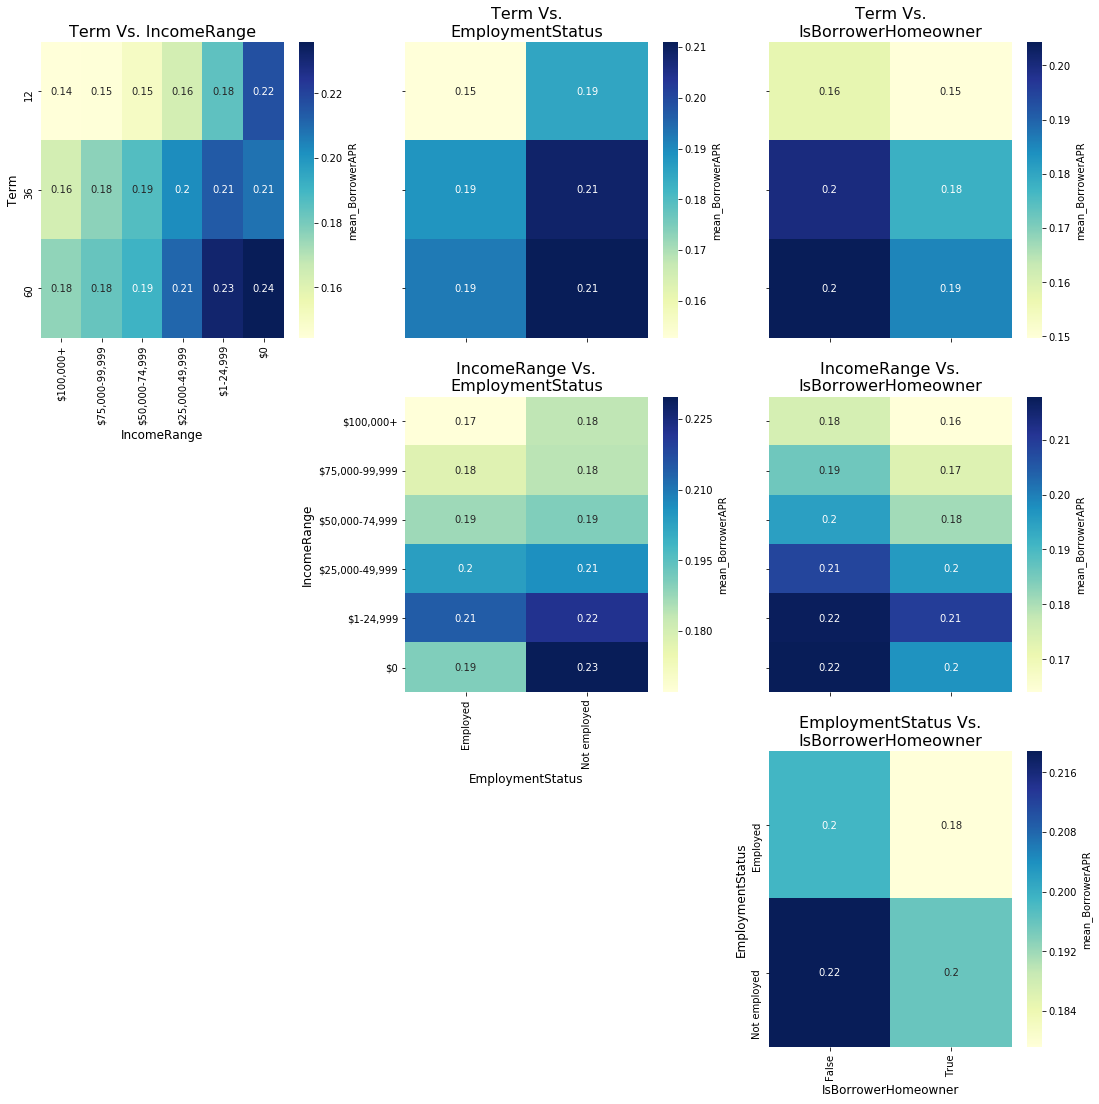

In [33]:
cols = ['Term', 'IncomeRange', 'EmploymentStatus', 'IsBorrowerHomeowner']
n = len(cols)
fig, ax = plt.subplots(figsize = [25,25],squeeze=False); 
for i in range(n):
    for j in range(i+1,n):
        axis = plt.subplot2grid((n, n), (i, j))
        heatmapGrid(cols[i], cols[j],axis)
        if j != i + 1:
            axis.set_ylabel('')
            axis.set_yticklabels([])
            axis.set_xlabel('')
            axis.set_xticklabels([])

**Very limited interaction between the categorical variables. The conslusion concerning APR is same as in the bivariate analysis case.**

In [34]:
def heatmapGrid_num(x, y,ax):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    xbin_edges = np.arange(0, df[x].max(),df[x].max()/7 ).round(0)
    xbin_idxs = pd.cut(df[x], xbin_edges, right = False,include_lowest = True)
    ybin_edges = np.arange(0, df[y].max(),df[y].max()/7 ).round(0)
    ybin_idxs = pd.cut(df[y], ybin_edges, right = False, include_lowest = True)
    mean_APR = df.groupby([xbin_idxs,ybin_idxs]).BorrowerRate.mean()
    mean_APR = mean_APR.reset_index(name = 'APRmean')
    mean_APR = mean_APR.pivot(index = x, columns = y,values = 'APRmean')
    sb.heatmap(mean_APR,annot = False,cmap = "YlGnBu", cbar_kws = {'label' : 'mean_BorrowerAPR'},ax=ax)
    ax.set_title(textwrap.fill(cols[i] + ' Vs. ' + cols[j], 25),fontsize = 16)
    ax.set_ylabel(cols[i],fontsize = 12)
    ax.set_xlabel(cols[j],fontsize = 12)
    ax.set_xticklabels([textwrap.fill(t.get_text(), 20)  for t in ax.get_xticklabels()],rotation=90)
    


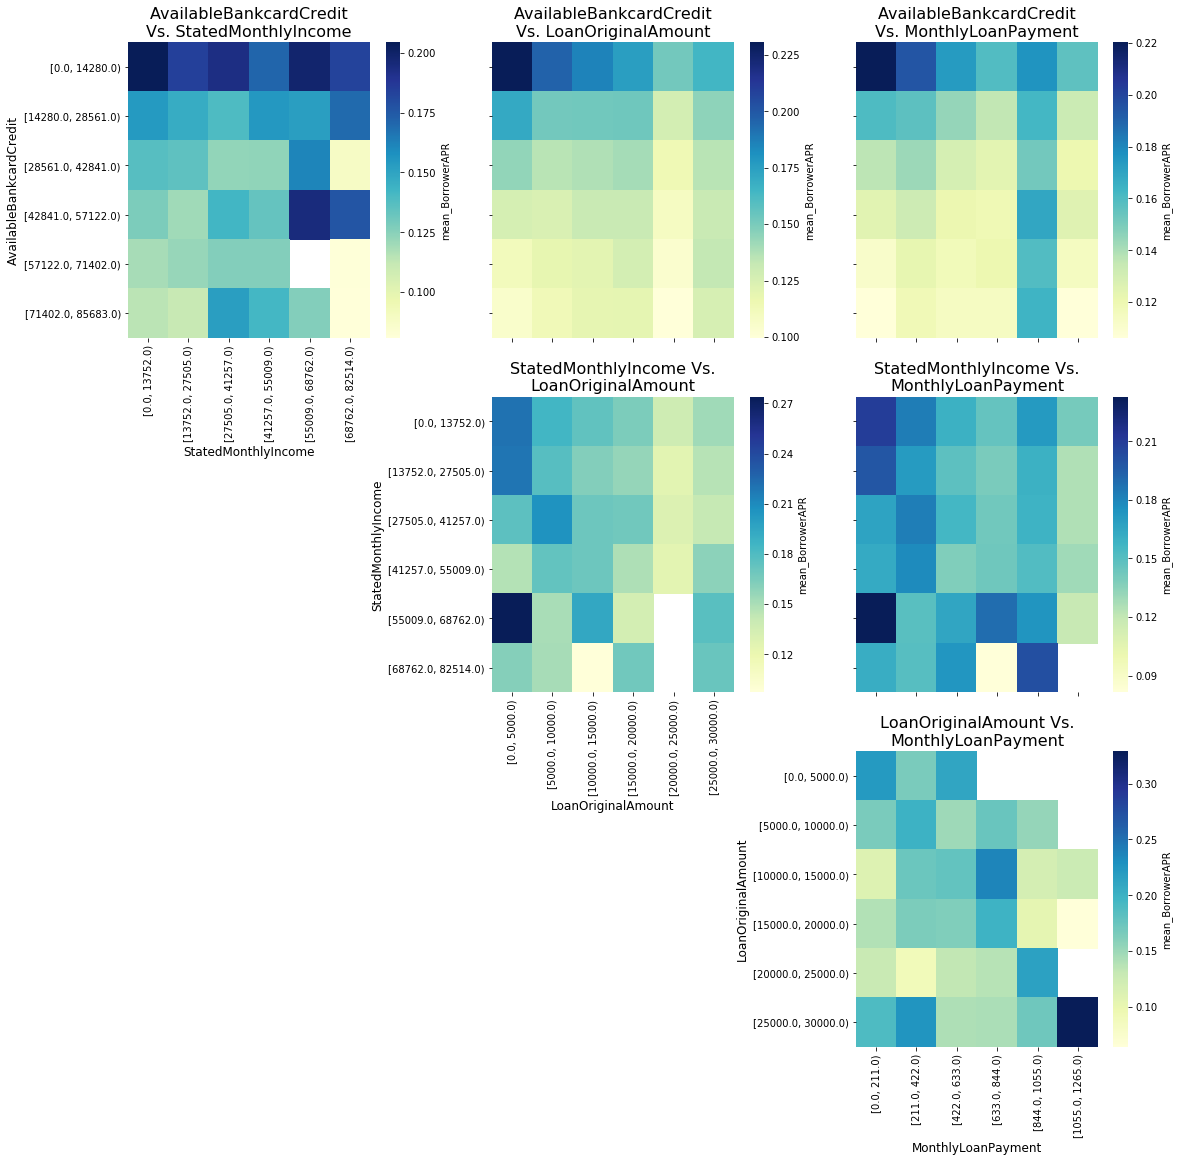

In [35]:
cols = ['AvailableBankcardCredit', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
n = len(cols)
fig, ax = plt.subplots(figsize = [25,25],squeeze=False); 
for i in range(n):
    for j in range(i+1,n):
        axis = plt.subplot2grid((n, n), (i, j))
        heatmapGrid_num(cols[i], cols[j],axis)
        if j != i + 1:
            axis.set_ylabel('')
            axis.set_yticklabels([])
            axis.set_xlabel('')
            axis.set_xticklabels([])

**The "BorrowerAPR" mean is calculated as the interaction between the numerical features, and the following conclusions could be made:**
1. **"AvaliableBankcardcredit"**: Low credit has a higher APR.
2. **"LoanOriginalAmount"**: Lower loans have higher APRs.
3. **"MonthlyLoanPayment"**: Lower payments have higher APRs.
4. **"StatedMonthlyIncome"**: The relation isn't clear.

> **There seems to be an interesting relation between the "LoanOriginalAmount" and the "MonthlyLoanPayment". Let's see further.**

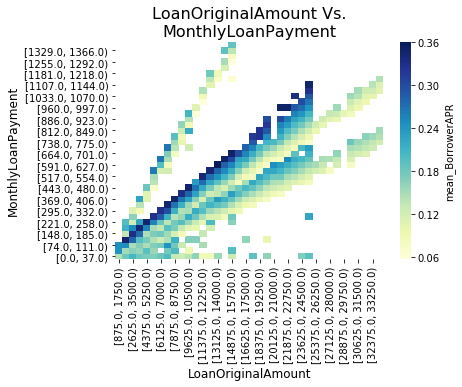

In [36]:
xbin_edges = np.arange(0, df['LoanOriginalAmount'].max(),df['LoanOriginalAmount'].max()/40 ).round(0)
xbin_idxs = pd.cut(df['LoanOriginalAmount'], xbin_edges, right = False,include_lowest = True)
ybin_edges = np.arange(0, df['MonthlyLoanPayment'].max(),df['MonthlyLoanPayment'].max()/40 ).round(0)
ybin_idxs = pd.cut(df['MonthlyLoanPayment'], ybin_edges, right = False, include_lowest = True)
mean_APR = df.groupby([xbin_idxs,ybin_idxs]).BorrowerRate.mean()
mean_APR = mean_APR.reset_index(name = 'APRmean')
mean_APR = mean_APR.pivot(index = 'MonthlyLoanPayment', columns = 'LoanOriginalAmount' ,values = 'APRmean')
sb.heatmap(mean_APR,annot = False,cmap = "YlGnBu", cbar_kws = {'label' : 'mean_BorrowerAPR'})
plt.title(textwrap.fill('LoanOriginalAmount' + ' Vs. ' + 'MonthlyLoanPayment', 25),fontsize = 16)
plt.ylabel('MonthlyLoanPayment',fontsize = 12)
plt.xlabel('LoanOriginalAmount',fontsize = 12)
plt.gca().invert_yaxis()

C:\Users\MoritaLab_Student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


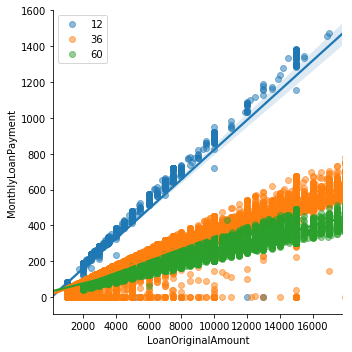

In [37]:
g= sb.FacetGrid(data=df,hue='Term',size=5)
g.map(sb.regplot,'LoanOriginalAmount','MonthlyLoanPayment',scatter_kws={'alpha':0.5})
plt.legend()

> From the above two plots, we can see a how the MonthlyLoanPayment relation to the "LoanOriginalAmount" depends on the Term period. Within each Term, the APR seems to be the same with some variations due to other factors.

A final plot is made to investigate how much does one's income matters when it comes to loans.

C:\Users\MoritaLab_Student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


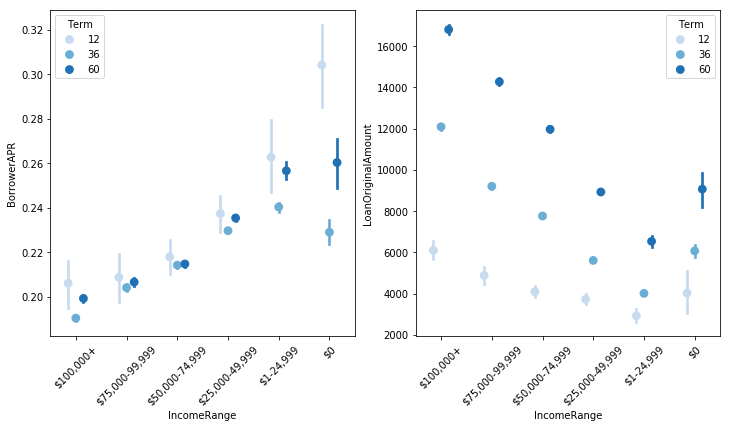

In [38]:
#wrapping code from https://stackoverflow.com/questions/42813744/seaborn-boxplot-get-the-xtick-labels
fig, ax = plt.subplots(ncols = 2, figsize = [12,6]);
g1 = sb.pointplot(data=df,y='BorrowerAPR',x='IncomeRange',hue='Term',dodge=0.3,linestyles='',palette='Blues',ax=ax[0]);
ax[0].set_xticklabels([textwrap.fill(t.get_text(), 15)  for t in ax[0].get_xticklabels()],rotation=45);
sb.pointplot(data=df,y='LoanOriginalAmount',x='IncomeRange',hue='Term',dodge=0.3,linestyles='',palette='Blues',ax=ax[1]);
ax[1].set_xticklabels([textwrap.fill(t.get_text(), 15)  for t in ax[1].get_xticklabels()],rotation=45);


**With higher income, one can afford to get larger loans and low APRs. Sounds unfair to the poor!**
**Also, long term periods allow for larger loan amounts.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The interactions didn't help to make new observations concerning APR. But interesting findings about MonthlyLoandPayment and LoanOriginalAmount were identified. 

### Were there any interesting or surprising interactions between features?

> The dependence of MonthlyLoanPayment on the loan amount and term period was expected but the dependence of the APR was quite interesting.